# Week 1 - Neural Networks
# August 3, 2023.

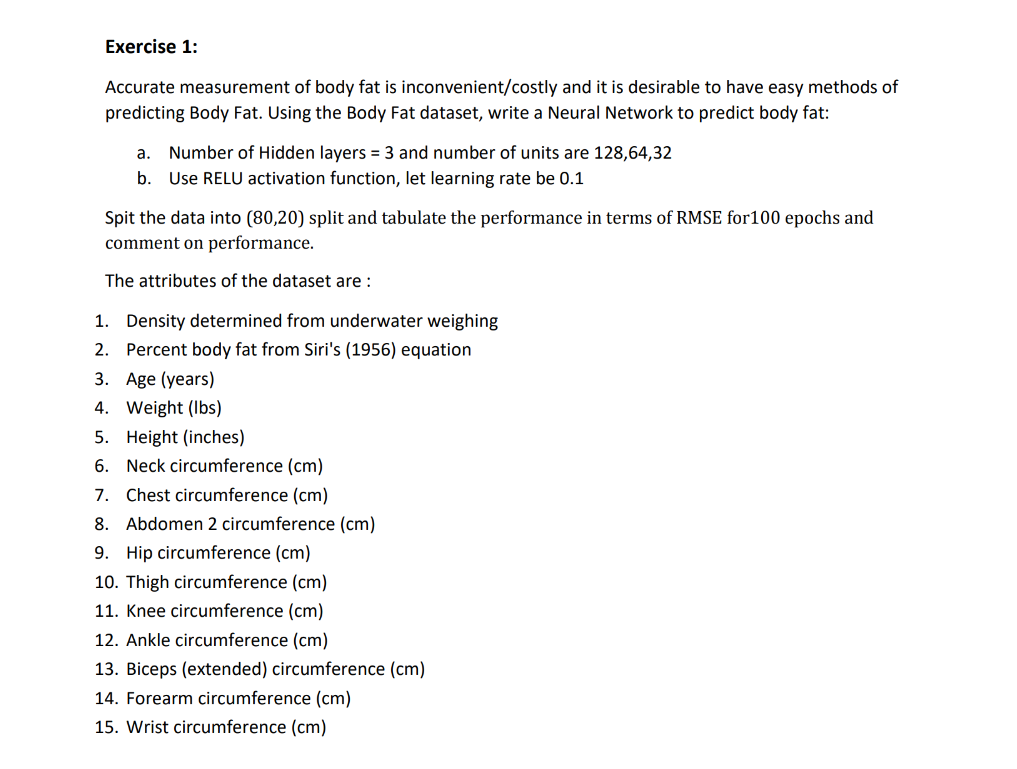

In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

tf.random.set_seed(42)
# Load the dataset
data = pd.read_csv("bodyfat.csv")

print(data.info())

# Split features and target
X = data.loc[:, data.columns != 'BodyFat'].values
y = data['BodyFat'].values

# Split the data into training and testing sets (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features is typically done to ensure that all features
# contribute equally to the learning process and to avoid scenarios where a
# feature with a larger magnitude dominates the learning process compared to other features.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network
model = tf.keras.Sequential([
    tf.keras.layers.Input(14,),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model, used RMSE since its a regression model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100,batch_size=16, validation_split=0.1, verbose=1)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB
None
Epoch 1/100
12/12 [==============================] - 1s 20ms/step - loss: 1003.3232 - root_mean_squared_error: 31.6753 - val_loss: 943.3035 - val_root_mean_squared_error: 30.7132
Epoch 2/100
1

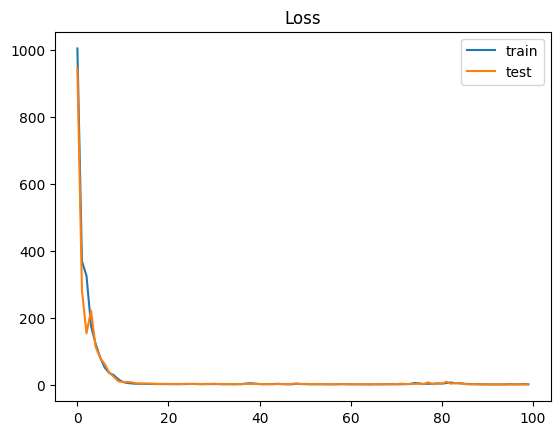

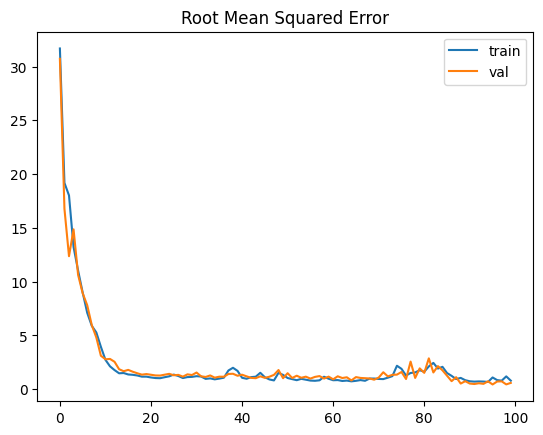

In [17]:
# plot for loss during training and validation
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# plot for RMSE during training and validation
pyplot.title('Root Mean Squared Error')
pyplot.plot(history.history['root_mean_squared_error'], label='train')
pyplot.plot(history.history['val_root_mean_squared_error'], label='val')
pyplot.legend()
pyplot.show()